# Week07: Data Visualization

In this week, we learn how to visualize data with ggplot2 in R. The main textbook is "Exploratory Data Analysis with R" by Roger D. Peng. 

## ggplot2 Plotting System
The ggplot2 package is a popular plotting system in R. It is an implementation of The Grammer of Graphics as described by Leland Wilkinson. The gammer of graphics represents an abstraction of graphics ideas and objects. You can think of this as developing the verbs, nouns, and adjectives for data graphics. The ggplot2 system defines useful aesthetic attributes (color, shape, size) and geometric objects (points, lines, bars) to make a plot easier. 

The ggplot2 system assumes to use a data frame. Before starting to make a plot, you should transform your data into a data frame. Also, you should use informative and descriptive labels on your data. 

The ggplot2 system has two main plot functions.

* qplot()
* ggplot()

More references:
* [ggplot2](https://ggplot2.tidyverse.org/)
* [Data Visualization with ggplot2: Cheetsheet](https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf)
* [Which Visualization? A Quick Reference](https://ExperCeption.net)


### qplot
The qplot function is useful for quickly putting data to make a plot. It is a convient function which includes many default settings of ggplot2. It works like the plot function in base graphics system. It looks for variables to plot within a data frame. 

At first, import the ggplot2 package.

In [1]:
library(ggplot2)

The [mpg](https://ggplot2.tidyverse.org/reference/mpg.html) data is installed with ggplot2 as an example dataset. It contains the fule economy of 38 popular models of car from 1999 to 2008. More information is at https://ggplot2.tidyverse.org/reference/mpg.html

In [2]:
str(mpg)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


The qlot function uses a scatterplot to plot 2-dimensional data by default. The following example shows a scatterplot of the engine displacement (displ) and the highway miles per gallon (hwy). The qplot function finds these variables from the dataset specified at the data argument.

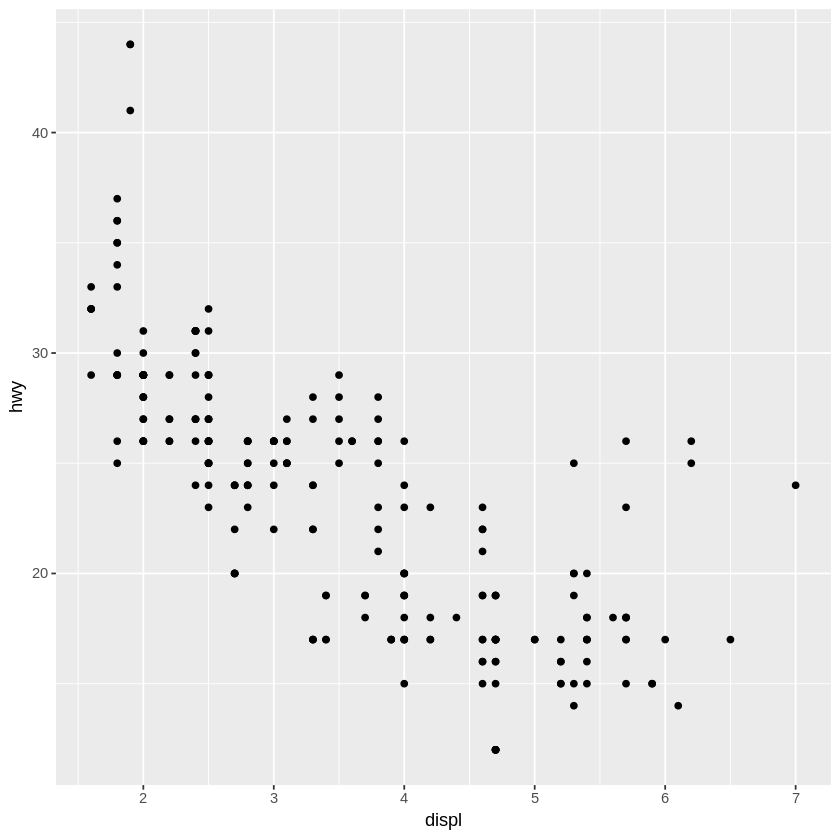

In [3]:
qplot(displ, hwy, data = mpg)

### Modifying aesthetics

Color is an aesthetic attribute and the color of each point can be mapped to a variable. In this example, the color is mapped to the drv variable which indicates whether a car is front wheel drive (f), rear wheel drive (r), or 4-wheel drive (4).

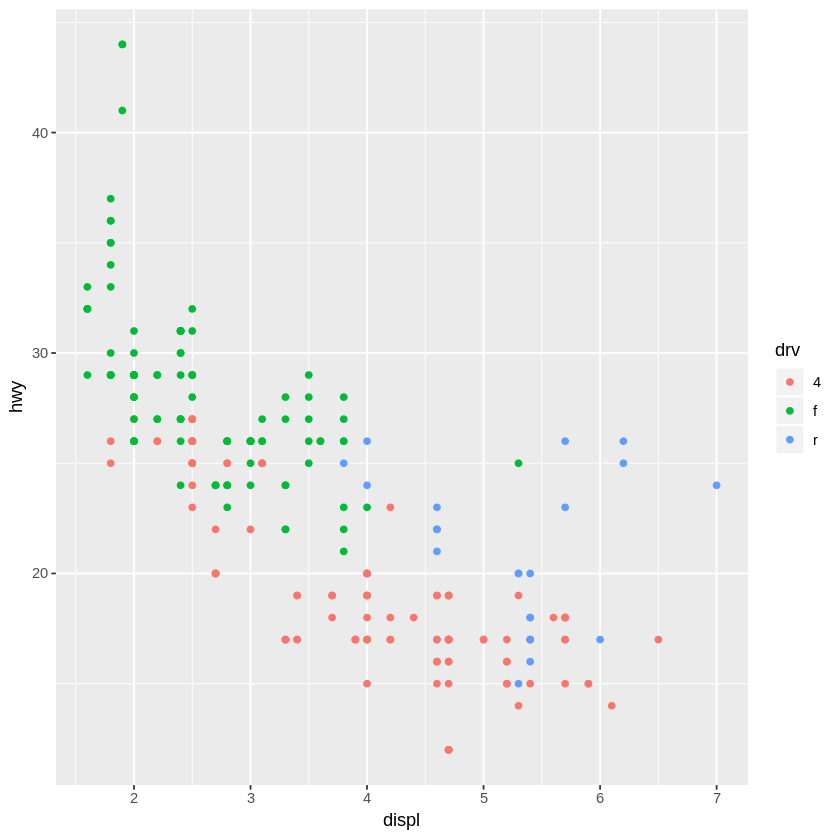

In [4]:
qplot(displ, hwy, data = mpg, color = drv)

### Adding a geom
A smooth to a scatterplot can be added to be able to see trends. It is a geom that you can add along with your data points. This geom argument indicates that the smooth overlays the points. Note that the points did not speficy previously because it was done automatically. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


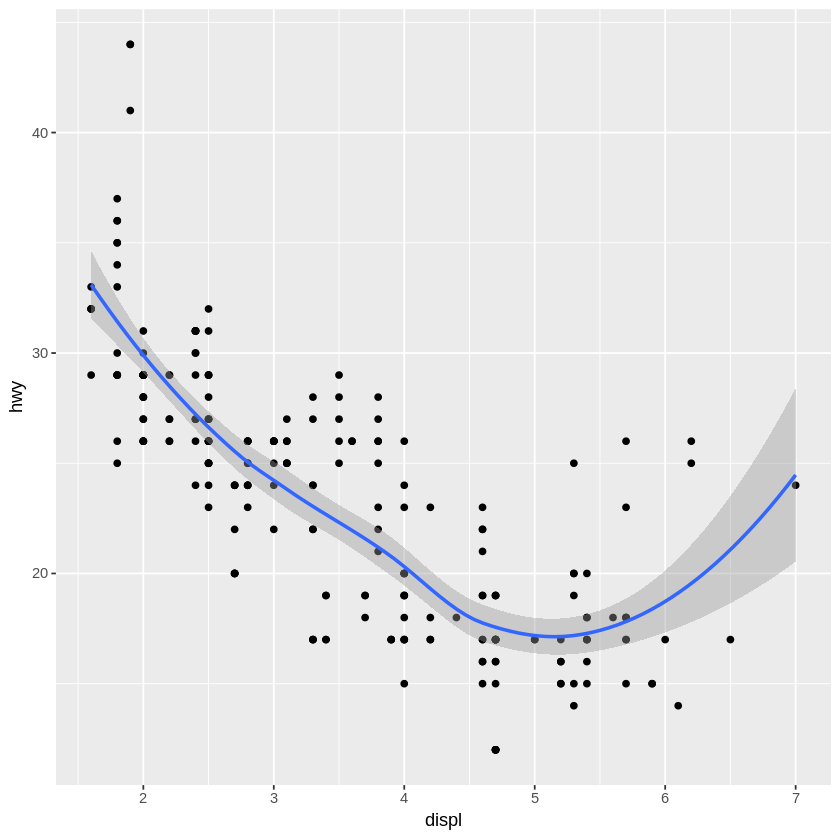

In [5]:
qplot(displ, hwy, data = mpg, geom = c("point", "smooth"))

### Histgrams
The qplot function make a histrgram to plot 1-dimensional data by default. This histgram stratifies the highway mileage according to the drive class. 

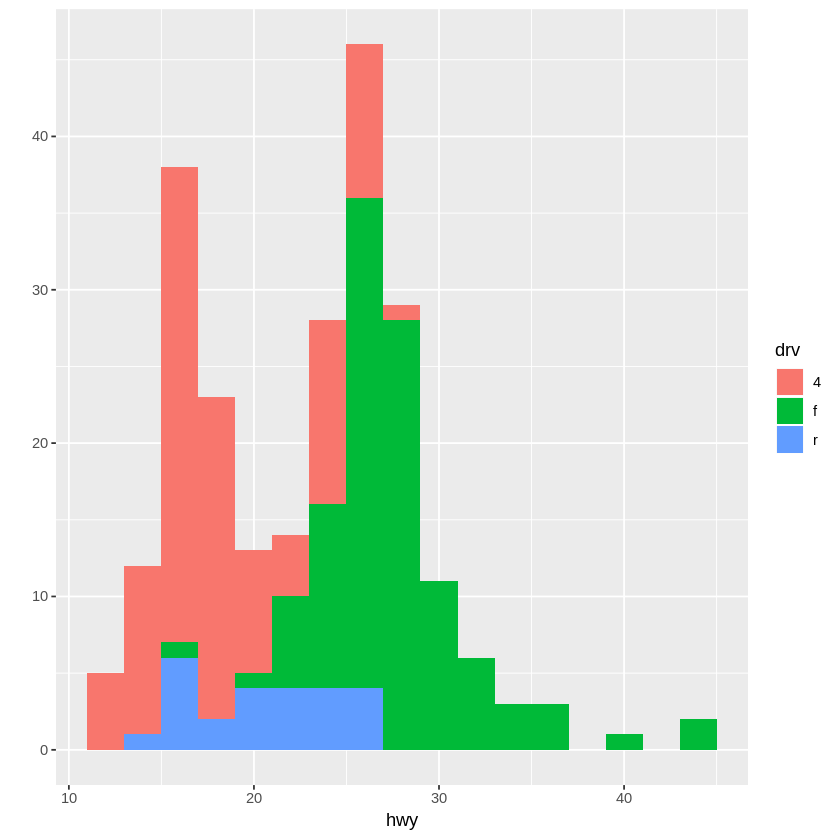

In [6]:
qplot(hwy, data = mpg, fill = drv, binwidth = 2)

### Boxplot
The problem of this histgram is that three histgrams overlays on top of each other. Therefore it is difficult to separete out. 
Boxplot is useful to separate each drive class.

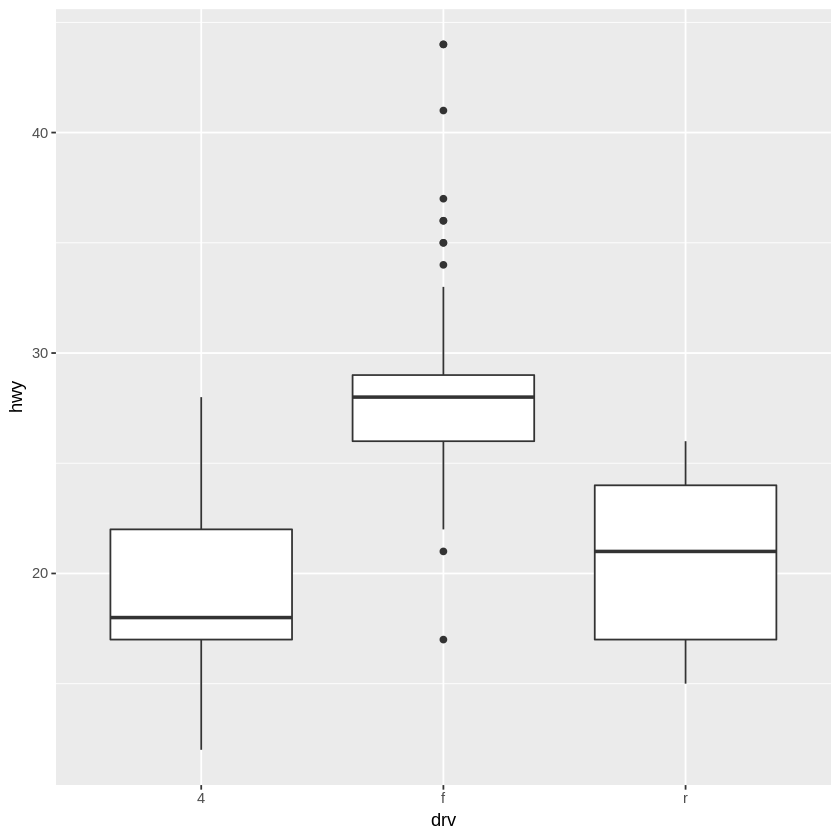

In [7]:
qplot(drv, hwy, data = mpg, geom = "boxplot")

### Facets
Facets are a way to create multiple panels of plots on the levels of categorical variable. This is another solution to separate. 


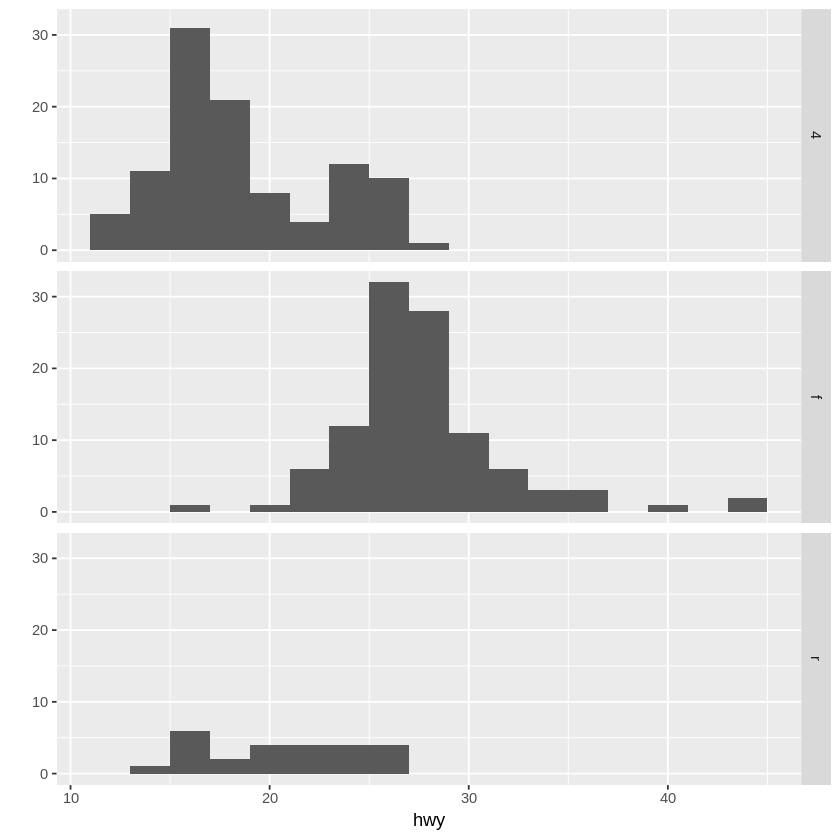

In [8]:
qplot(hwy, data = mpg, facets = drv ~ ., binwidth = 2)

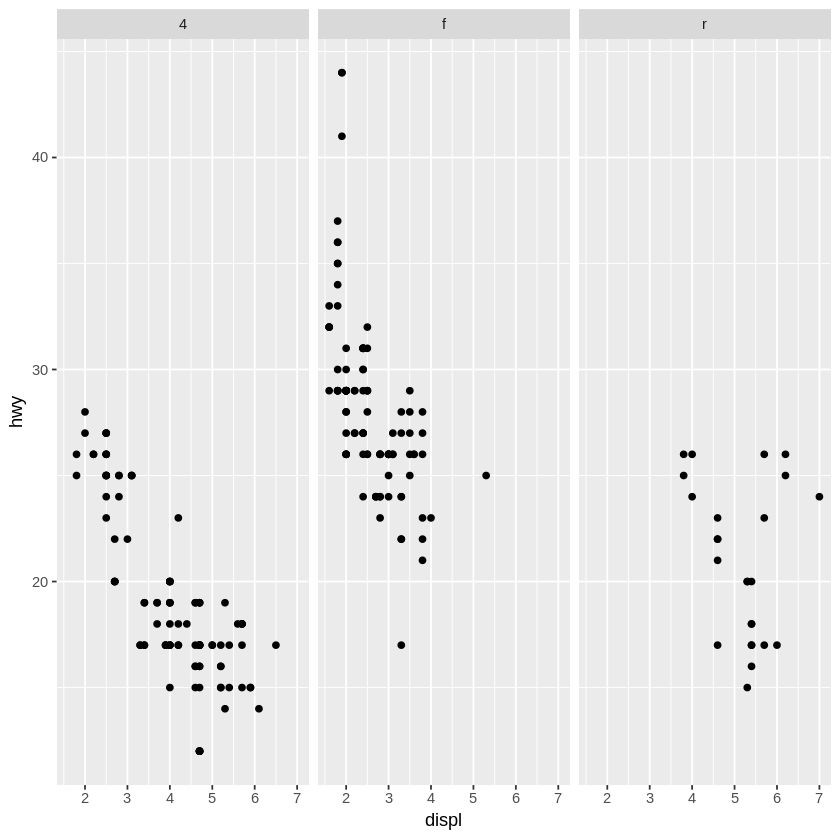

In [9]:
qplot(displ, hwy, data = mpg, facets = . ~ drv)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


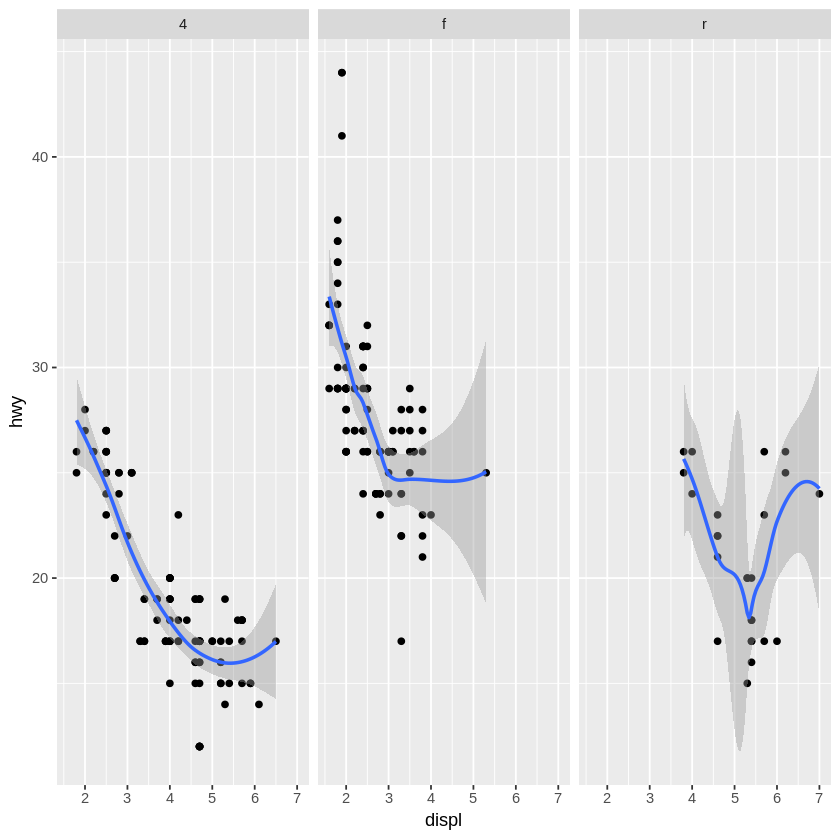

In [10]:
qplot(displ, hwy, data = mpg, facets = . ~ drv, geom = c("point", "smooth"))

### Exercise

* Use other variables of the mpg dataset
  * Refer to [mpg description](https://ggplot2.tidyverse.org/reference/mpg.html) to know meanings of variables.
  * See the result of str(mpg)
  * Make plots with qplot


## ggplot

We will get into a little more of how ggplot2 builds plots and how you can customize various aspects of any plot. The ggplot function is the basic function to build a plot on the ggplot2 plotting system. 

### Base Components of ggplot2

A ggplot2 plot consists of a number of key components:

* A data frame: stores all of the data that will be displayed on the plot
* Aesthetic mappings: describe how data are mapped to color, size, shape, location
* Geoms: geometric objects like points, lines, shapes
* Facets: describes how conditional/panel plots should be constructed
* Stats: statistical transformations like binning, quantiles, smoothing.
* Scales: what scale an aesthetic map uses (example: male = red, female = bule).
* Coordinate system: describes the system in which the locations of the geoms will be drawn

### Building Up in Layers
In the qplot section, we ran the following call.

```{r}
qplot(displ, hwy, data = mpg)
```

This section shows the same result with the ggplot function step by step. First we can create a ggplot object that stores the dataset and the basic aesthetics for mapping the x- and y-coordinates for the plot. 

In [11]:
g <- ggplot(data = mpg, aes(x = displ, y = hwy))
summary(g)

data: manufacturer, model, displ, year, cyl, trans, drv, cty, hwy, fl,
  class [234x11]
mapping:  x = ~displ, y = ~hwy
faceting: <ggproto object: Class FacetNull, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet, gg>


You can see the ggplot object including a data frame, mappings and facets. The print function sends a ggplot object to the plot device explicitly.

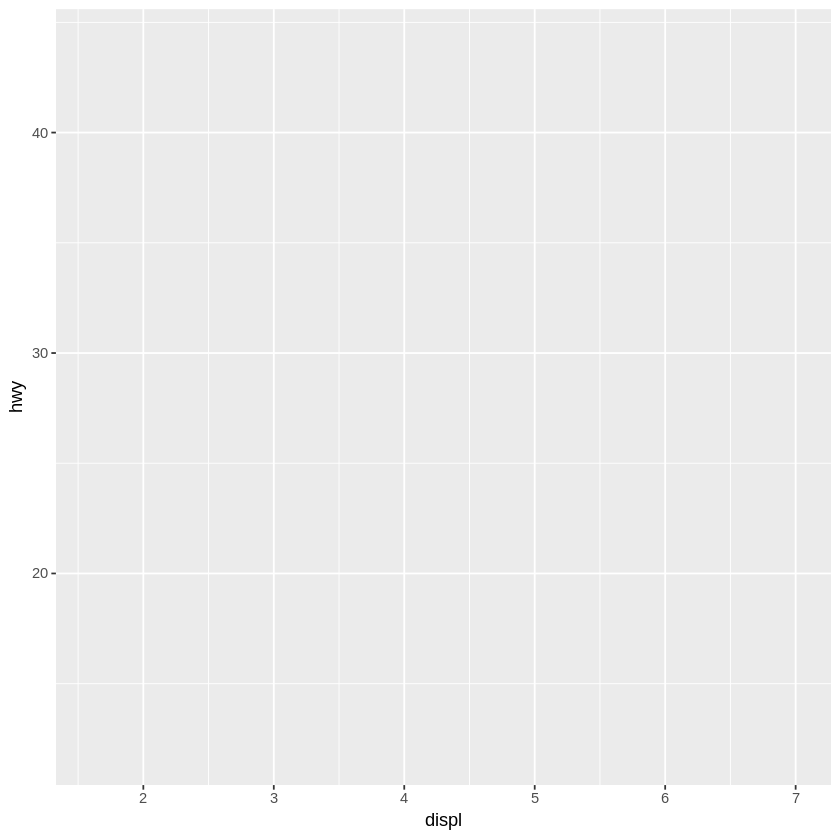

In [12]:
print(g)

### Plot with Point Layer

To make a scatterplot like qplot, we need to add a point geom. We can use the geom_point function to make a tranditional scatterplot. The symbol '+' is used to add a layer into a ggplot object.

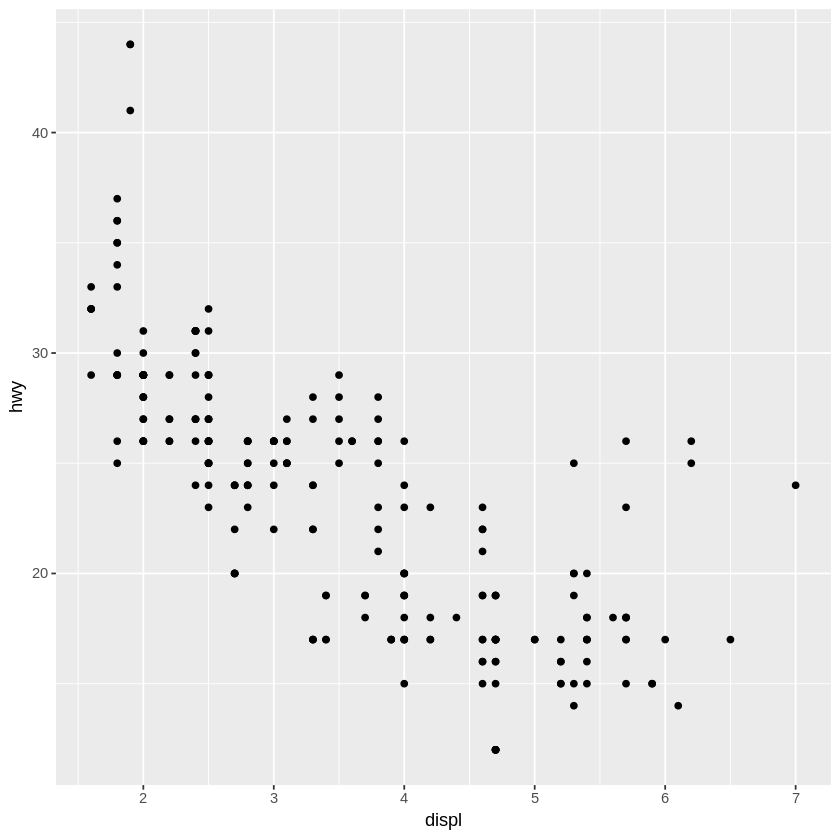

In [13]:
g <- ggplot(data = mpg, aes(x = displ, y = hwy))
g + geom_point()

### Adding More Layers

If we want more layers, we can use more '+' symbols to add layers. The following example is to add a smoother and a black and white theme. 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


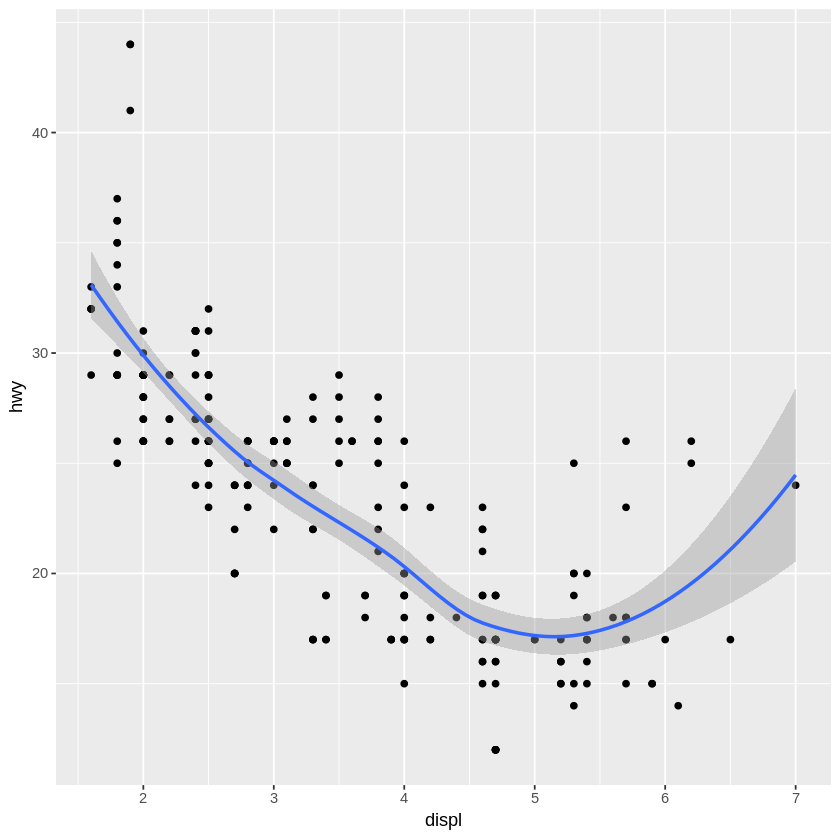

In [14]:
g <- ggplot(data = mpg, aes(x = displ, y = hwy))
g + geom_point() + geom_smooth()

If you do not need to keep a ggplot object, you can connect layers directly to make a plot. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


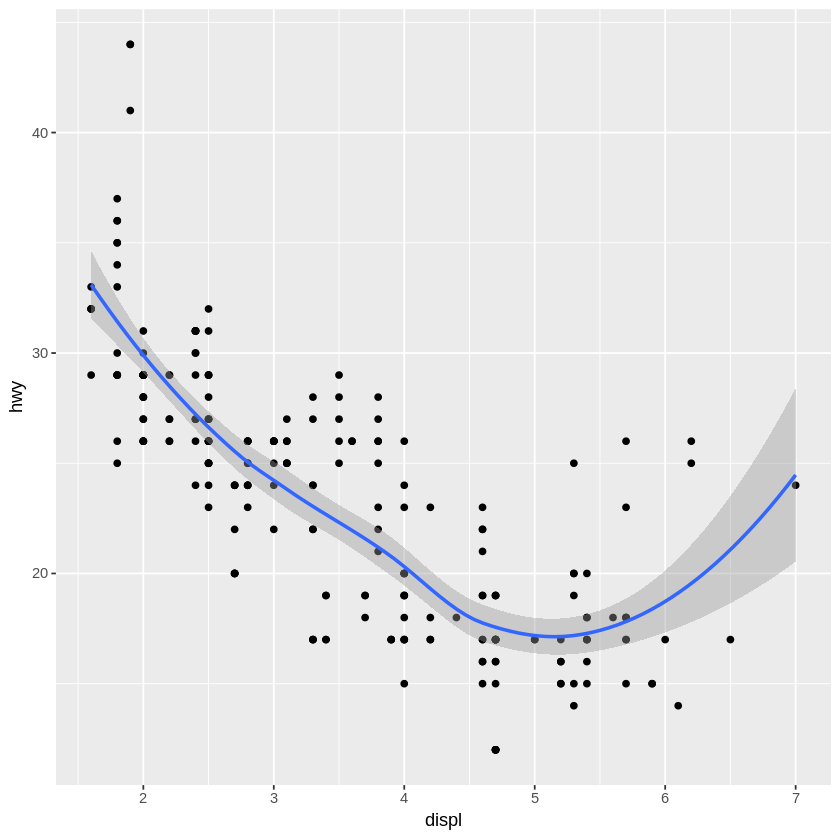

In [15]:
ggplot(data = mpg, aes(x = displ, y = hwy)) + 
  geom_point() +
  geom_smooth()

### Changing Arguments of Layers

The default smoother is a loess smoother which is flexible and nonparametric but sometimes too flexible. If we would like to use a simple linear regression line to highlight any first order trends. We can do this by specifying method = "lm" to the geom_smooth function. 

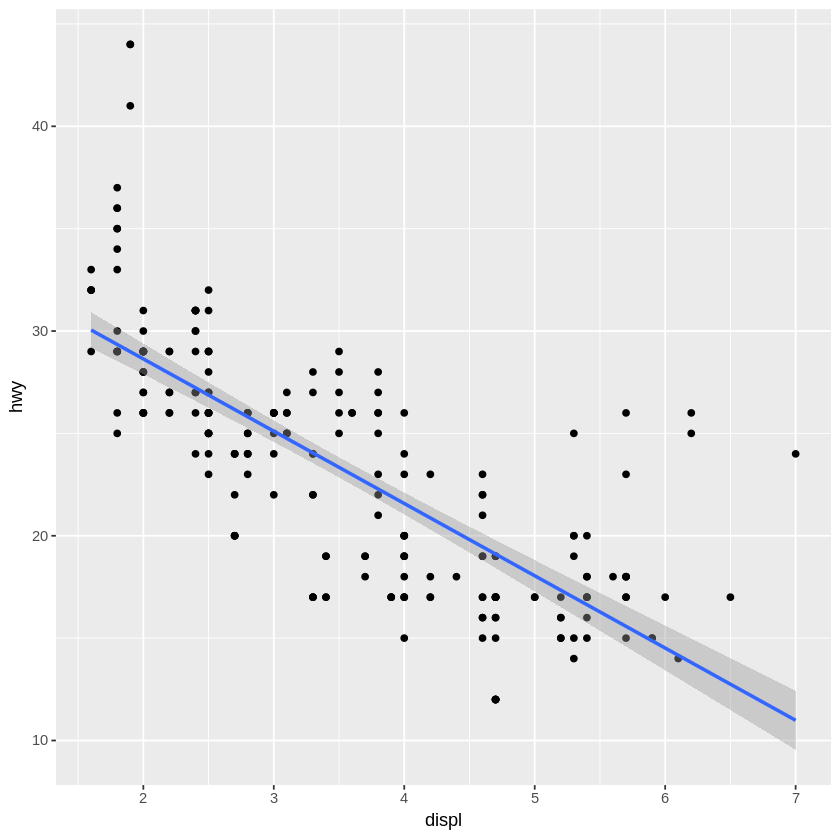

In [16]:
ggplot(data = mpg, aes(x = displ, y = hwy)) + 
  geom_point() +
  geom_smooth(method = "lm")

### Adding More Layers: Facets

The following example is how to use facets with ggplot.

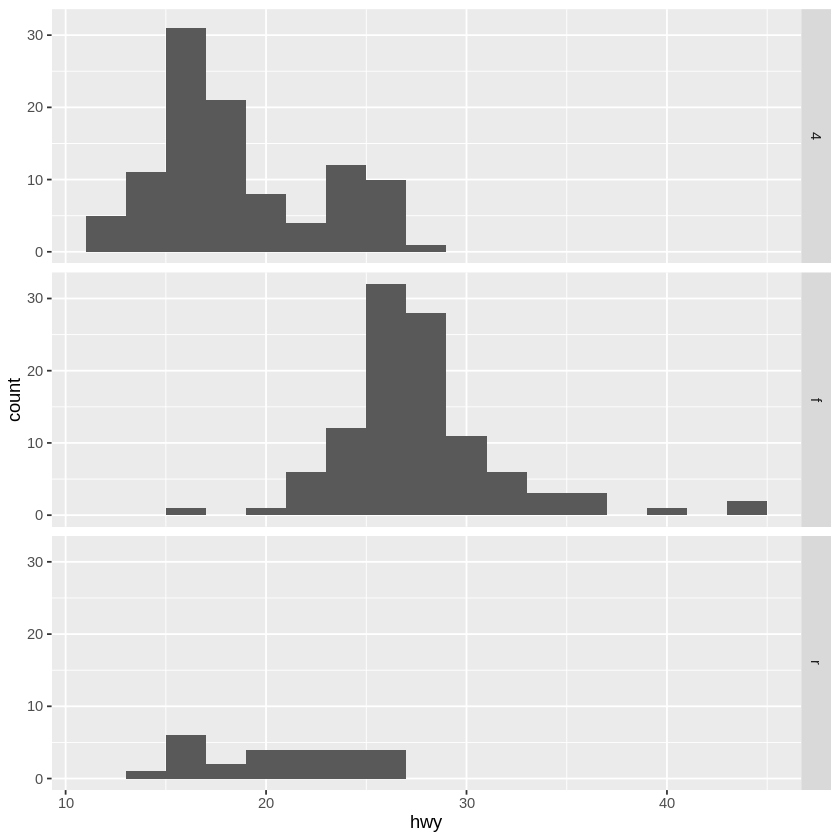

In [17]:
ggplot(data = mpg, aes(hwy)) + 
  geom_histogram(binwidth = 2) +
  facet_grid(vars(drv))

### Annotations

There are a variety of annotations you can add to a plot. 

* xlab: x-axis label
* ylab: y-axis label
* ggtitle: plot title
* lab: multiple types of labels at once

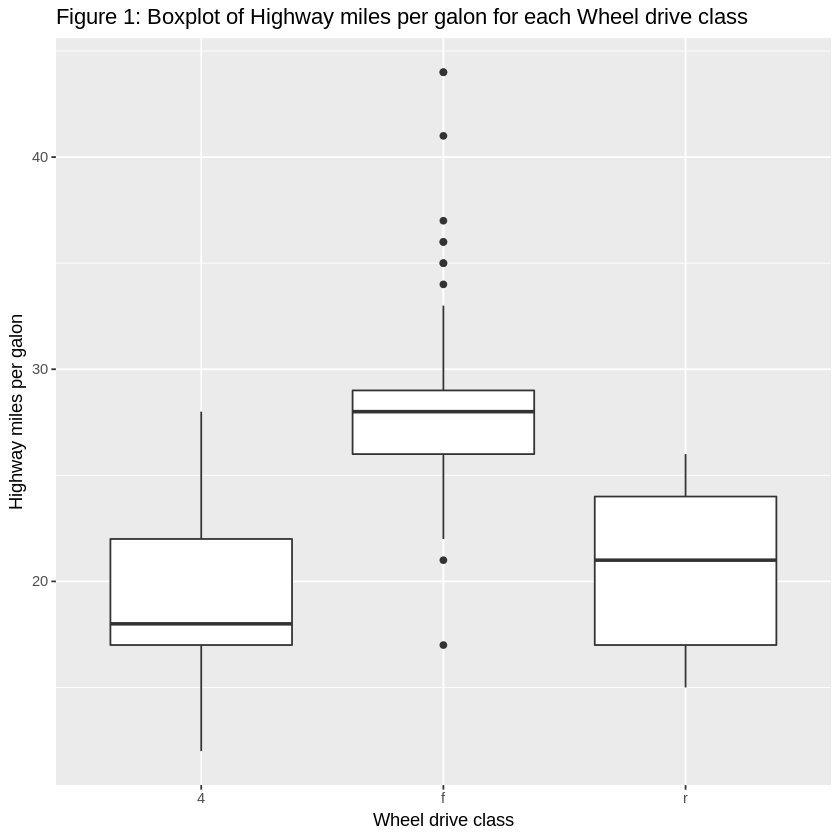

In [18]:
ggplot(data = mpg, aes(drv, hwy)) + 
  geom_boxplot() +
  xlab("Wheel drive class") +
  ylab("Highway miles per galon") +
  ggtitle("Figure 1: Boxplot of Highway miles per galon for each Wheel drive class")

### Themes

The look of a plot can be changed by theme functions. A theme changes a background color, a panel background color, grid lines and fonts. The default theme is theme_gray. The following code shows both the black and white theme and the dark theme. 

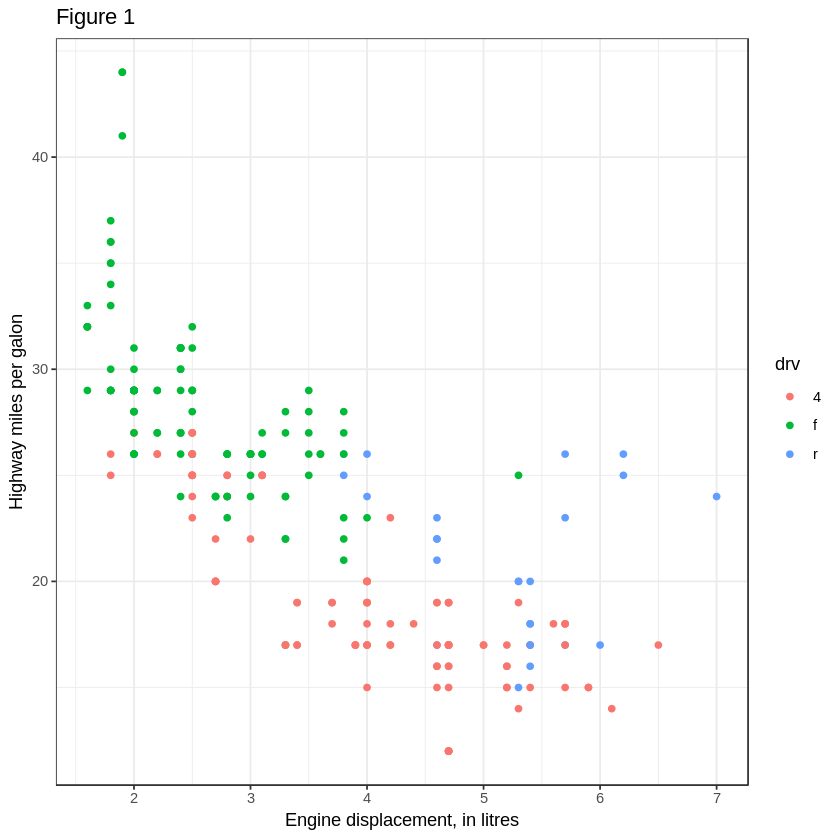

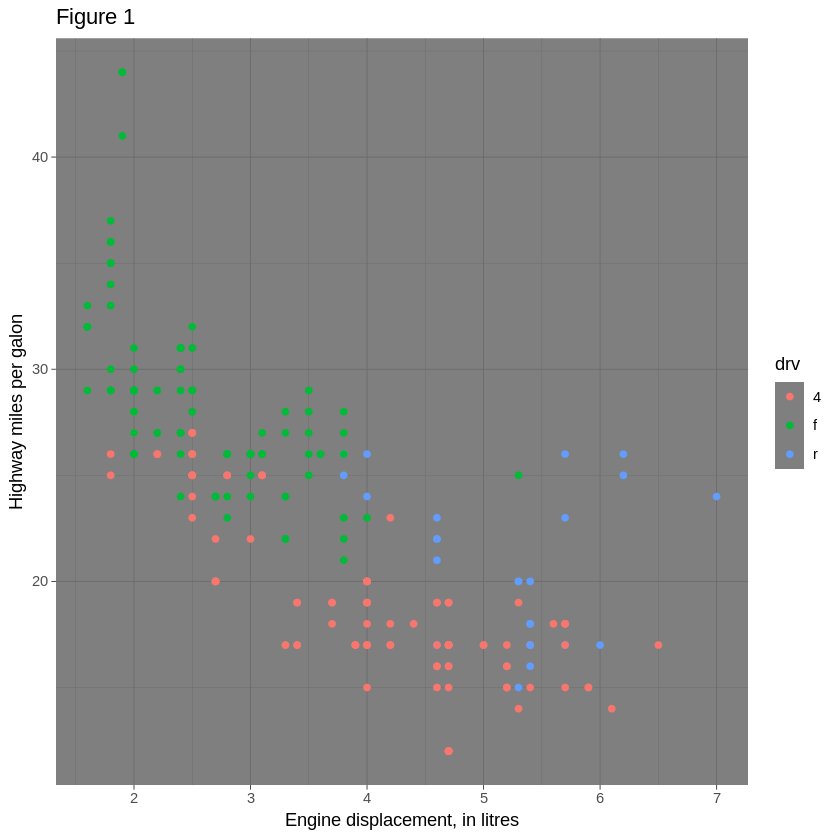

In [19]:
g <- ggplot(data = mpg, aes(x = displ, y = hwy)) +
  geom_point(aes(color = drv)) +
  labs(x = "Engine displacement, in litres", y = "Highway miles per galon") +
  labs(title = "Figure 1")
g + theme_bw()
g + theme_dark()

### Line chart

There are many other charts in ggplot2. The geom_line function shows a line chart. The economics dataset is used as an example here because it includes time scale data. 

In [20]:
data(economics)
str(economics)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	574 obs. of  6 variables:
 $ date    : Date, format: "1967-07-01" "1967-08-01" ...
 $ pce     : num  507 510 516 513 518 ...
 $ pop     : int  198712 198911 199113 199311 199498 199657 199808 199920 200056 200208 ...
 $ psavert : num  12.5 12.5 11.7 12.5 12.5 12.1 11.7 12.2 11.6 12.2 ...
 $ uempmed : num  4.5 4.7 4.6 4.9 4.7 4.8 5.1 4.5 4.1 4.6 ...
 $ unemploy: int  2944 2945 2958 3143 3066 3018 2878 3001 2877 2709 ...


The following code shows population of USA. 

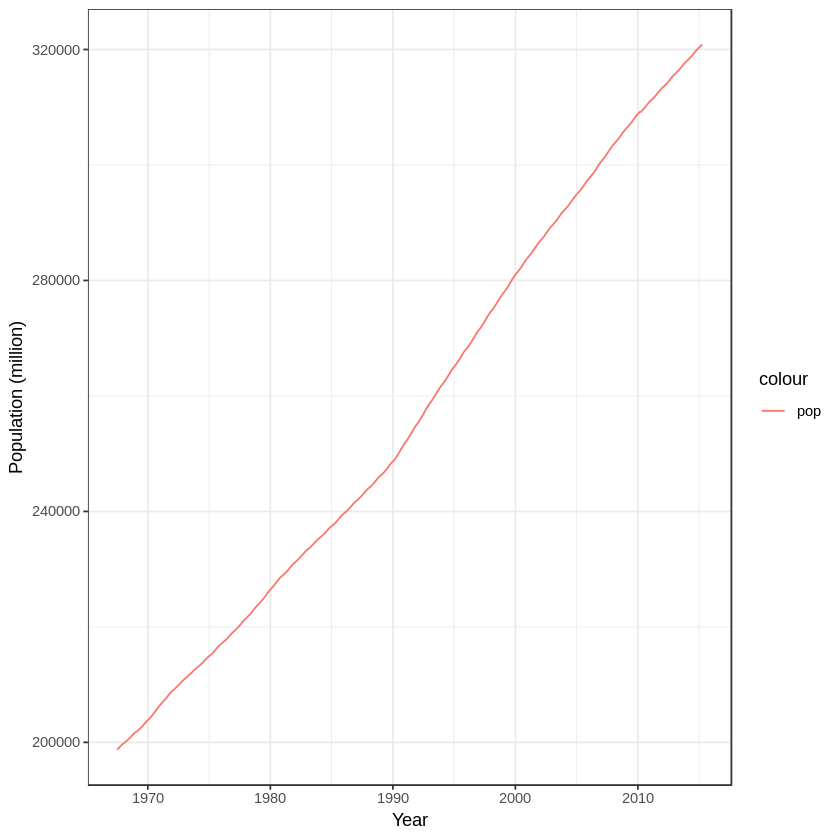

In [21]:
ggplot(data = economics, aes(x = date, y = pop, color = "pop")) +
  geom_line() +
  labs(x = "Year", y = "Population (million)") +
  theme_bw()

### Multiple lines

If you would like to draw multiple geoms with different variables, the aestethic argments should be included in the geom function instead of the ggplot function to specify variables. 

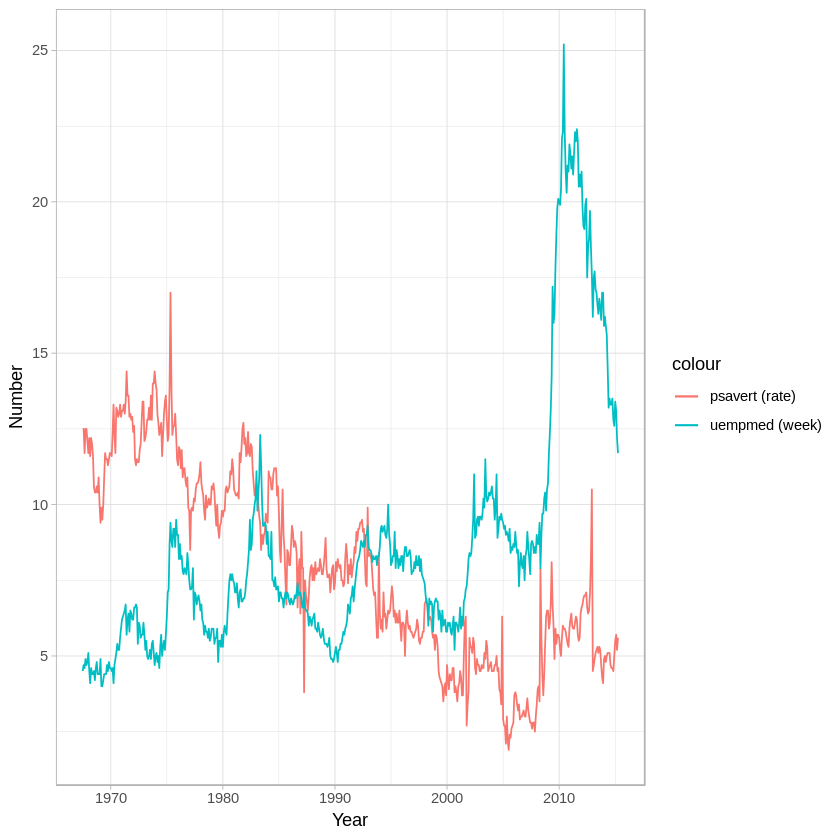

In [22]:
ggplot(data=economics) +
  geom_line(aes(x=date, y=psavert, color="psavert (rate)")) + 
  geom_line(aes(x=date, y=uempmed, color="uempmed (week)")) +
  labs(x = "Year", y = "Number") +
  theme_light()

In this example, the data argument is still in ggplot, however, it can be used into geom_line, too. Then you can pick data from diffrent data frames.

### Exercise

* Download [Data Visualization with ggplot2 Cheat Sheet](https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf)
* Execute examples of Geoms to show results
  - Note that some of them can not be executed because of missing packages in this environemnt. 


## Graphics Devices
A graphics device is something where you can make a plot appear. Examples:

* Screen device (to show on your computer)
  * Mac: quartz
  * Windows: windows
  * Unix/Linux: x11
* File device (to save as a file)
  * pdf
  * png
  * jpeg
  * svg

The list of devices supported by your computer is found in ?Devices. 

In [23]:
?Devices

When you make a plot in R, it is sent to a specific device. Usually you want to use a screen device for quick visualizations and exploratory analysis. The qplot function send a plot to the screen device by default. 

### Graphics file devices
Sometimes you want to save a plot as a file. File devices are used for that. 

1. Explicitly launch a graphics device
2. Call a plotting function to make a plot
3. Annotate the plot if necessary
4. Explicitly close graphics device with dev.off()

If you use a file device, no plot will appear on the screen. This example uses qplot to be short but ggplot can be also used.

In [24]:
svg("test.svg")
qplot(displ, hwy, data = mpg)
dev.off()

png 
  2

If you want to save a plot to a file and show on the screen, you can use the dev.copy function. 



png 
  3

png 
  2

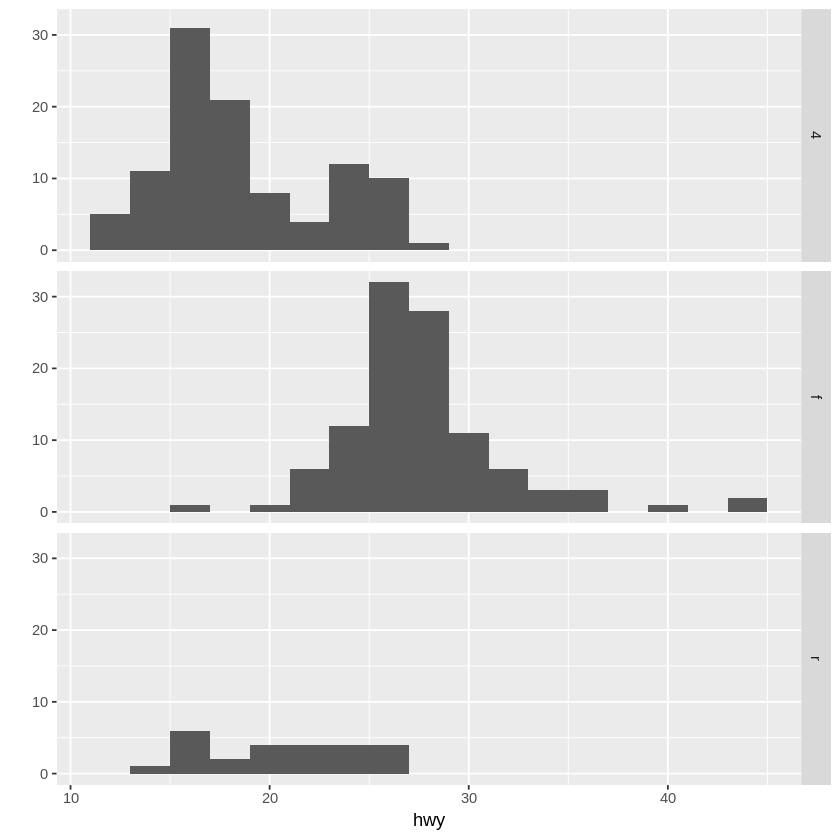

In [25]:
qplot(hwy, data = mpg, facets = drv ~ ., binwidth = 2)
dev.copy(png, file = "test.png")
dev.off()

### ggsave
The ggplot2 provides the ggsave function to save a file. The follwoing call saves the latest plot as a png file with some parameters.

In [26]:
ggsave("ggplotsave.png", width = 4, height = 4, dpi = 300)

Also you can save a plot of a specified ggplot object. 

In [27]:
g0 <- ggplot(data = mpg, aes(x = cty, y = hwy))
g1 <- g0 + geom_point()
g2 <- g1 + geom_smooth()

ggsave("g1.png", g1, width = 4, height = 4, dpi = 300)
ggsave("g2.png", g2, width = 4, height = 4, dpi = 300)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


### Exercise

* Show a plot with the jpeg file device. 
* Save a svg file by the ggsave function.


## Further Exercise
* Check [ggplot2 Reference](https://ggplot2.tidyverse.org/reference/) to understand ggplot2 more.
* Use the data function to explore available datasets.
* Try new datasets to make plots. 

## Advanced topic: Leaflet

If data has geographic coordinates like spatial points, it is natural to visualize them on a map. Leaflet is a popular interactive map library in Javascript originally. [Leaflet for R](https://rstudio.github.io/leaflet/markers.html) is an R library to create an interactive map without JavaScript.


In [28]:
library(leaflet)

### Showing a map

Lealet uses the leaflet function at first. Then we need to use the pipe operator '%>%' to connect multiple processes. The following example is to show the default map. 

In [29]:
leaflet() %>%
  addTiles()

HTML widgets cannot be represented in plain text (need html)

### Setting a marker to a place

The next example is to set a marker at NII to show a map around NII.

In [30]:
leaflet() %>%
  addTiles() %>%
  addMarkers(lng = 139.75781, lat = 35.6925) %>%
  setView(lng = 139.75781, lat = 35.6925, zoom = 16)

HTML widgets cannot be represented in plain text (need html)

### Quakes dataset
We use the quakes dataset installed in R as an example.

In [31]:
data(quakes)
str(quakes)

'data.frame':	1000 obs. of  5 variables:
 $ lat     : num  -20.4 -20.6 -26 -18 -20.4 ...
 $ long    : num  182 181 184 182 182 ...
 $ depth   : int  562 650 42 626 649 195 82 194 211 622 ...
 $ mag     : num  4.8 4.2 5.4 4.1 4 4 4.8 4.4 4.7 4.3 ...
 $ stations: int  41 15 43 19 11 12 43 15 35 19 ...


### Adding markers to show points

The quakes dataset includes 1000 objects. The following code uses the first 20 objects to make points. 

In [32]:
leaflet(data = quakes[1:20,]) %>%
  addTiles() %>%
  addMarkers(~long, ~lat, popup = ~as.character(mag), label = ~as.character(mag))

HTML widgets cannot be represented in plain text (need html)

### Marker Clustering
This example shows how to use marker clusters to display a large number of markers on a map. You can use the markerClusterOptions to combine markers of close proximity into clusters and simplify the display of markers. 

In [34]:
leaflet(data = quakes) %>%
  addTiles() %>%
  addMarkers(~long, ~lat, popup = ~as.character(mag), label = ~as.character(mag), 
             clusterOptions = markerClusterOptions())


HTML widgets cannot be represented in plain text (need html)